<h1>Data Science Project: Planning Stage (Individual)</h1>

### Name: Karuna Johnson

### Student ID: 13204052

<h2>Data Description</h2>

A UBC Computer Science group is collecting data on how people play video games using a Minecraft server that records player actions. There are two datasets: `players.csv` and `sessions.csv`. Below is a summary of each dataset:

--- 

`players.csv` **(Player Data)**

- **Observations (Rows):** 194
- **Variables (Columns):** 7

**Variable Descriptions:**

| Variable          | Type       | Description                                    |
|-------------------|------------|------------------------------------------------|
| `hashedEmail`     | Character| Unique anonymized email                    |
| `name`            | Character| Player’s in-game name                     |
| `Age`             | Double    | Player's age (in years)                        |
| `gender`          | Character| Player's self-reported gender                                |
| `experience`      | Character| Player's self-reported experience level        |
| `played_hours`    | Double    | Total hours spent playing                      |
| `subscribe`       | Logical| Whether the player subscribed to the game newsletter (TRUE/FALSE) |

**Potential Issues:**

- Outlier ages or playtimes may affect analysis.
- Gender is a self-reported variable and might not be fully reliable.
- Sampling bias is unknown (players may not represent general population).

---

`sessions.csv` **(Session Data)**

**Observations (Rows):** 1533

**Variables (Columns):** 5

**Variable Descriptions:**

| Variable             | Type       | Description                                  |
|----------------------|------------|----------------------------------------------|
| `hashedEmail`        | Character| Unique anonymized email, can be used to link with `players.csv`   |
| `start_time`         | Character   | Session start time                          |
| `end_time`           | Character   | Session end time                            |
| `original_start_time`| Double   | Alternative start time recording            |
| `original_end_time`  | Double   | Alternative end time recording              |

**Potential Issues:**

- Missing timestamps could affect session duration calculation.
- Some players may have incomplete or erroneous session data.
- Possible duplicate or overlapping sessions.
- Time zone inconsistencies.

<h2>Questions</h2>

- **Broad Question**:  
What player characteristics and behaviors are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

- **Specific Question**:  
Can a player's total playtime (`played_hours`), number of sessions (`number_of_sessions`), and experience level (`experience`) predict whether they subscribe to the game-related newsletter (`subscribe`)?

<h2>Exploratory Data Analysis and Visualization</h2>

In [1]:
# Importing libraries
library(tidyverse)
library(tidymodels)
library(repr)
library(RColorBrewer)
library(ggplot2)
library(forcats)
library(lubridate)

# Limiting output of dataframes to 6 rows
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
# Loading the datasets
players <- read_csv("https://raw.githubusercontent.com/karunaj28/ds_project_planning/refs/heads/main/players.csv", show_col_types = FALSE)
players
sessions <- read_csv("https://raw.githubusercontent.com/karunaj28/ds_project_planning/refs/heads/main/sessions.csv", show_col_types = FALSE)
sessions

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


In [3]:
# Number of rows and columns in each dataset

cat("Players Dataset: ", nrow(players), "rows,", ncol(players), "columns\n")

cat("Sessions Dataset: ", nrow(sessions), "rows,", ncol(sessions), "columns\n")

# Check for missing values in each dataset
cat("\nMissing values in players.csv:\n")
print(colSums(is.na(players)))

cat("\nMissing values in sessions.csv:\n")
print(colSums(is.na(sessions)))

# Check unique values for categorical variables in players
cat("\nUnique values in 'experience':\n")
print(unique(players$experience))

cat("\nUnique values in 'gender':\n")
print(unique(players$gender))

Players Dataset:  196 rows, 7 columns
Sessions Dataset:  1535 rows, 5 columns

Missing values in players.csv:
  experience    subscribe  hashedEmail played_hours         name       gender 
           0            0            0            0            0            0 
         Age 
           2 

Missing values in sessions.csv:
        hashedEmail          start_time            end_time original_start_time 
                  0                   0                   2                   0 
  original_end_time 
                  2 

Unique values in 'experience':
[1] "Pro"      "Veteran"  "Amateur"  "Regular"  "Beginner"

Unique values in 'gender':
[1] "Male"              "Female"            "Non-binary"       
[4] "Prefer not to say" "Agender"           "Two-Spirited"     
[7] "Other"            


In [4]:
# Summary statistics for quantitative variables: players dataset

summarize_players <- players |>
  summarize(total_players = n(),
    mean_age = mean(Age, na.rm = TRUE),
    median_age = median(Age, na.rm = TRUE),
    sd_age = sd(Age, na.rm = TRUE),
    min_age = min(Age, na.rm = TRUE),
    max_age = max(Age, na.rm = TRUE),
    mean_hours = mean(played_hours, na.rm = TRUE),
    median_hours = median(played_hours, na.rm = TRUE),
    sd_hours = sd(played_hours, na.rm = TRUE),
    min_hours = min(played_hours, na.rm = TRUE),
    max_hours = max(played_hours, na.rm = TRUE))
summarize_players

total_players,mean_age,median_age,sd_age,min_age,max_age,mean_hours,median_hours,sd_hours,min_hours,max_hours
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
196,20.52062,19,6.174667,8,50,5.845918,0.1,28.35734,0,223.1


### Summary Statistics for `players.csv`

| Variable      | Mean   | Median | Std. Deviation | Min | Max   |
|---------------|--------|--------|----------------|-----|-------|
| Age           | 20.52  | 19     | 6.17           | 8   | 50    |
| Played Hours  | 5.85   | 0.1    | 28.36          | 0   | 223.1 |

In [5]:
# Clean NA values from players
players_cleaned <- players |>
  filter(!is.na(experience), !is.na(hashedEmail), !is.na(played_hours),
         !is.na(Age), !is.na(subscribe))

# Clean NA values from sessions
sessions_cleaned <- sessions |>
  filter(!is.na(hashedEmail), !is.na(original_start_time), !is.na(original_end_time))

In [6]:
# Cumulative number of sessions per player (creating new column called number_of_sessions)
player_sessions <- sessions_cleaned |>
  group_by(hashedEmail) |>
  summarize(number_of_sessions = n(), .groups = "drop")

# Merge players and sessions datasets
players_extended <- players_cleaned |>
  left_join(player_sessions, by = "hashedEmail") |>
  filter(!is.na(number_of_sessions))  # remove players without sessions

# Convert 'experience' to factor
players_extended$experience <- as.factor(players_extended$experience)

# Final dataset: Selecting relevant columns 
# only total_playtime, number_of_sessions, experience, and subscribe are required to answer the question
players_final <- players_extended |>
  select(experience, played_hours, number_of_sessions, subscribe)

# View final dataset
players_final

experience,played_hours,number_of_sessions,subscribe
<fct>,<dbl>,<int>,<lgl>
Pro,30.3,27,TRUE
Veteran,3.8,3,TRUE
Veteran,0.0,1,FALSE
⋮,⋮,⋮,⋮
Veteran,0.3,1,FALSE
Amateur,0.0,1,FALSE
Amateur,2.3,6,FALSE


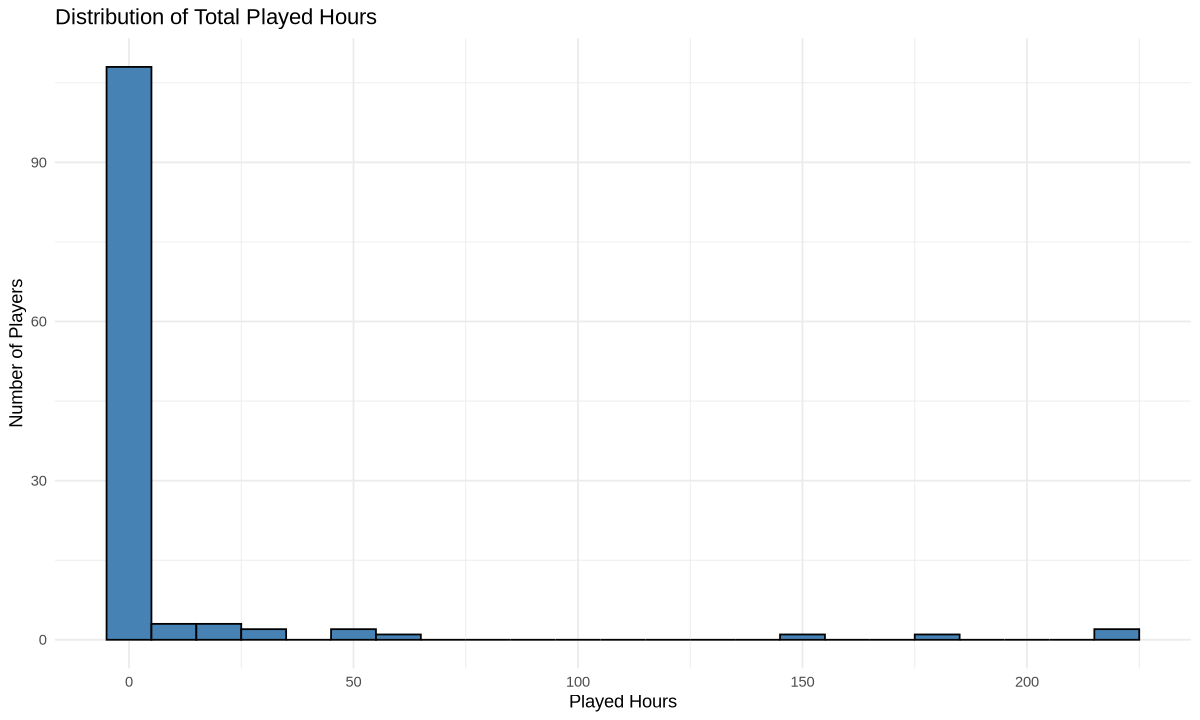

In [7]:
# Visualization 1: Distribution of Played Hours

options(repr.plot.width = 10, repr.plot.height = 6)

histogram_1 <- ggplot(players_final, aes(x = played_hours)) +
  geom_histogram(binwidth = 10, fill = "steelblue", color = "black") +
  labs(title = "Distribution of Total Played Hours", x = "Played Hours", y = "Number of Players") +
  theme_minimal()
histogram_1

Most players have very low total played hours. A small number of players have significantly higher hours, indicating a skewed distribution.

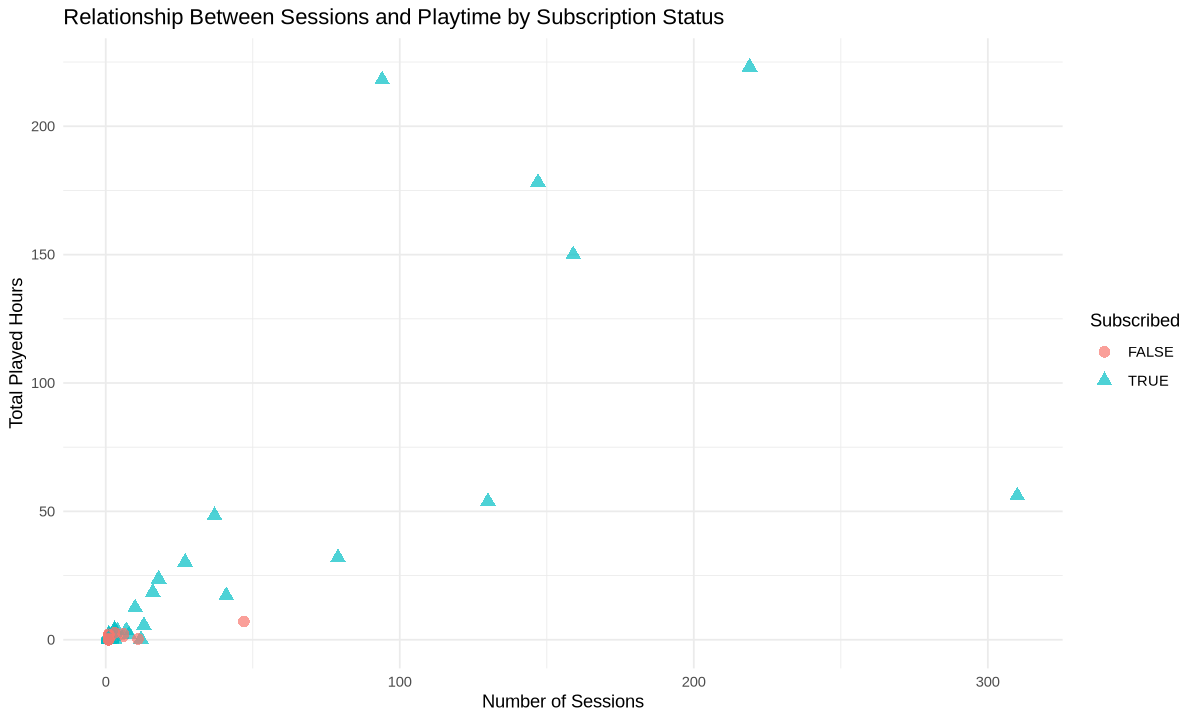

In [8]:
# Visualization 2: Number of Sessions vs. Played Hours by Subscription Status

options(repr.plot.width = 10, repr.plot.height = 6)

scatterplot_1 <- ggplot(players_final, aes(x = number_of_sessions, y = played_hours, color = as.factor(subscribe), shape = as.factor(subscribe))) +
  geom_point(alpha = 0.7, size = 3) + 
  labs(title = "Relationship Between Sessions and Playtime by Subscription Status",
    x = "Number of Sessions",
    y = "Total Played Hours",
    color = "Subscribed",
    shape = "Subscribed") +
  theme_minimal() 
scatterplot_1 

Subscribers tend to play more hours than non-subscribers, suggesting a link between playtime and subscribing.

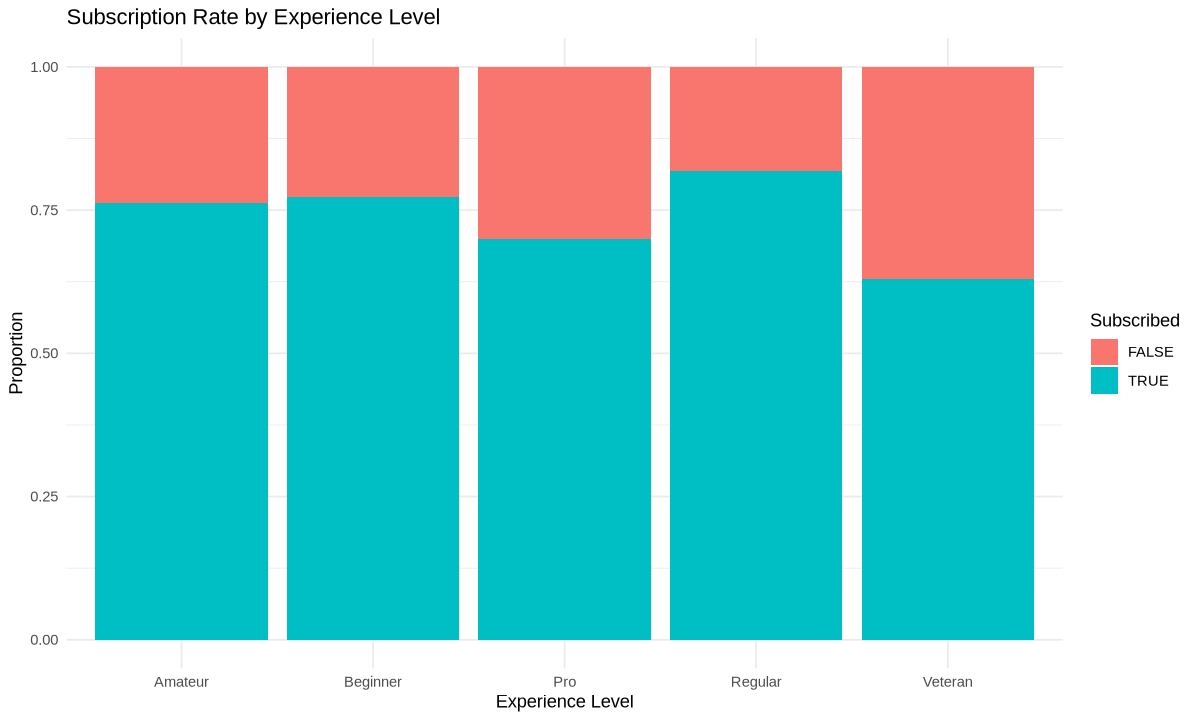

In [9]:
# Visualization 3: Experience Level vs. Subscription Rate

options(repr.plot.width = 10, repr.plot.height = 6)

bar_1 <- ggplot(players_final, aes(x = experience, fill = as.factor(subscribe))) +
  geom_bar(position = "fill") +
  labs(title = "Subscription Rate by Experience Level", x = "Experience Level", y = "Proportion", fill = "Subscribed") +
  theme_minimal()
bar_1

"Veterans" and "Pros" subscribe less than "Amateurs" and "Beginners," suggesting new players are more likely to subscribe.

<h2>Methods and Plan</h2>

Proposed method: **K-Nearest Neighbors (KNN) classification**.

---

**Why is this method appropriate?**

KNN makes no assumptions about relationships. It predicts by finding similar players (neighbors) and using a majority vote. KNN adapts complexity by tuning k and works with numeric and categorical variables if preprocessed.

---

**Which assumptions are required, if any, to apply the method selected?**

- Players similar in playtime, sessions, and experience behave similarly (subscribe or not).
- Numeric variables must be scaled to avoid dominating distance.
- Small k may overfit; large k may underfit.

---

**What are the potential limitations or weaknesses of the method selected?**

- Requires scaling.
- Slow with large datasets (distance calculation for all points).
- Class imbalance may cause always predicting "no subscription."
- Outliers can distort results.

---

**How are you going to compare and select the model?**

- Use 5-fold cross-validation on training data to find best k.
- Evaluate final model on test set.
- Assess accuracy, precision, recall, confusion matrix.
- Compare to a logistic regression model as a simpler baseline.

---

**How are you going to process the data to apply the model?**

- Split data (70% train, 30% test), stratified on subscribe.
- Preprocess: Scale numeric variables, Balance classes via upsampling if needed.
- Train KNN using workflow + tune_grid() to find best k.
- Evaluate on test set, compare to majority classifier.